<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

#matplotlib inline

In [82]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Couldn't figure out how to access the full Boston Df so I just joined the X and y dataframes

X.insert(1,'join',range(0,len(X)))

X.head()



,CRIM,join,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.insert(1,'join',range(0,len(y)))

y.head()

boston = pd.merge(X,y,on='join')

In [5]:
#Dropped the join column after we have the Df

boston = boston.drop('join',axis=1)

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.shape #Shows number of rows and columns in features 

(506, 14)

In [8]:
boston.dtypes #Shows data types of features.  All are floats

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
boston.isnull().sum() #There are no missing values in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
boston.describe() #Shows basic summary statistics of the features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
boston.nunique() #Number of unique values for each column

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

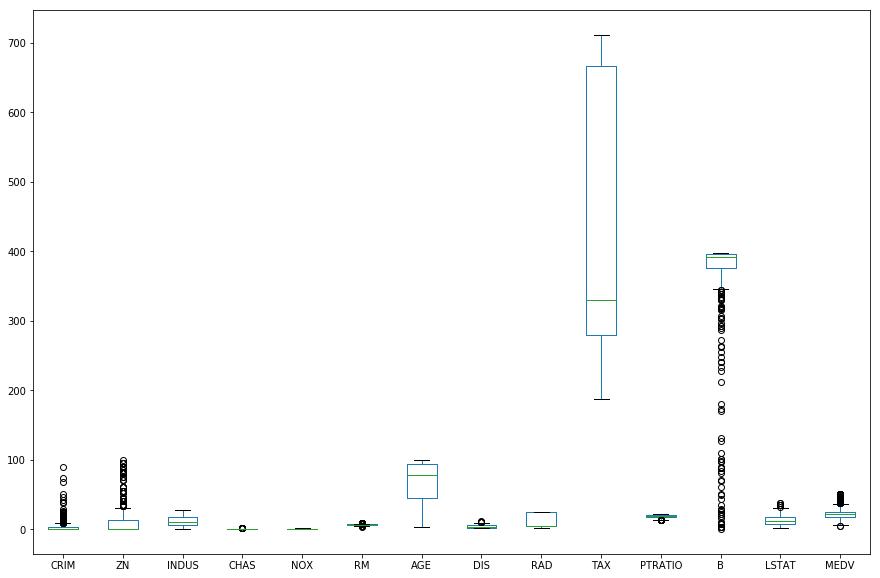

In [12]:
ax = boston.plot(kind='box',figsize=(15, 10)) #Distribution of each collumn. Crim ZN and B have several outliers

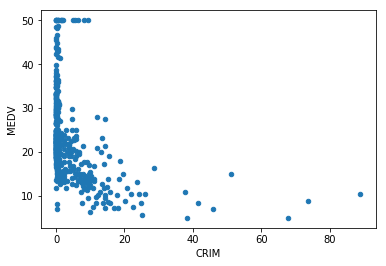

In [13]:
#Couldn't figure out a clean way of building scatter plots so I did them one by one

ax = boston.plot(x='CRIM',y='MEDV',kind='scatter')

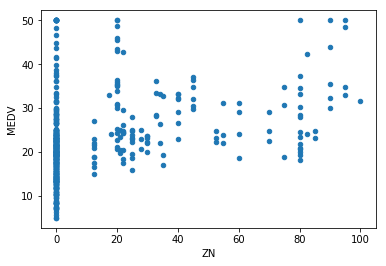

In [14]:
ax = boston.plot(x='ZN',y='MEDV',kind='scatter')

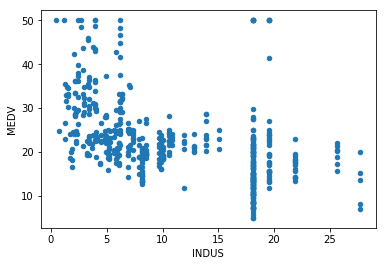

In [15]:
ax = boston.plot(x='INDUS',y='MEDV',kind='scatter')

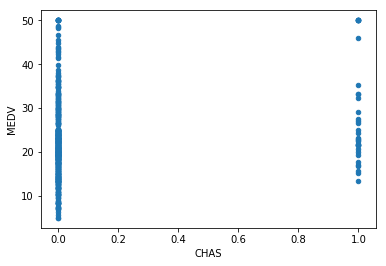

In [16]:
ax = boston.plot(x='CHAS',y='MEDV',kind='scatter')

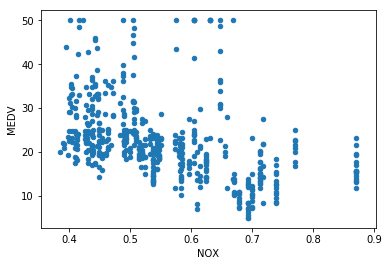

In [17]:
ax = boston.plot(x='NOX',y='MEDV',kind='scatter')

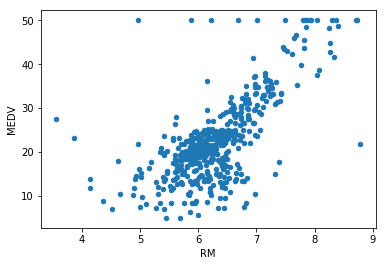

In [18]:
ax = boston.plot(x='RM',y='MEDV',kind='scatter')

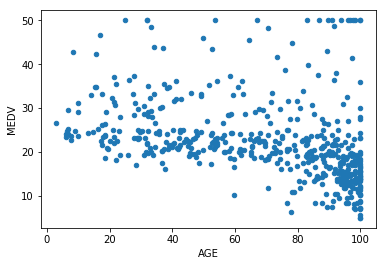

In [19]:
ax = boston.plot(x='AGE',y='MEDV',kind='scatter')

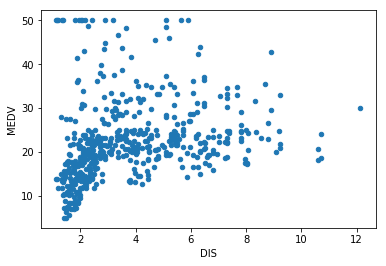

In [20]:
ax = boston.plot(x='DIS',y='MEDV',kind='scatter')

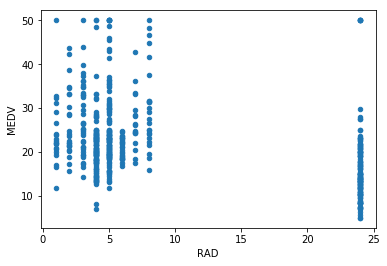

In [21]:
ax = boston.plot(x='RAD',y='MEDV',kind='scatter')

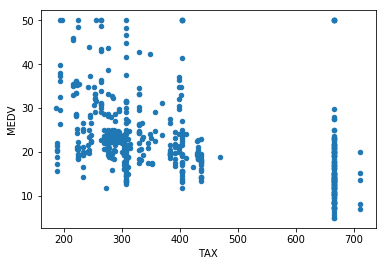

In [22]:
ax = boston.plot(x='TAX',y='MEDV',kind='scatter')

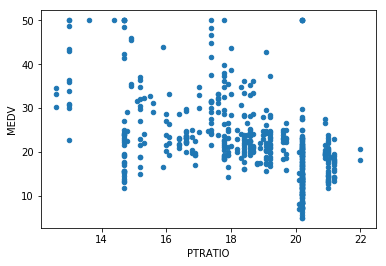

In [23]:
ax = boston.plot(x='PTRATIO',y='MEDV',kind='scatter')

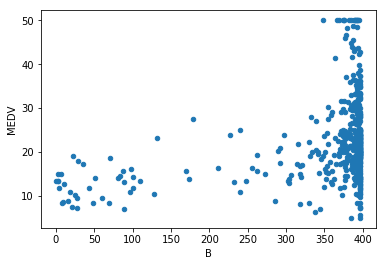

In [24]:
ax = boston.plot(x='B',y='MEDV',kind='scatter')

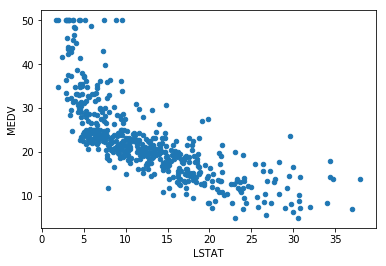

In [25]:
ax = boston.plot(x='LSTAT',y='MEDV',kind='scatter')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [42]:
null_pred = np.zeros(y.shape)
null_pred += [np.mean(y)]
null_pred;


In [45]:
from sklearn import metrics

null_mse = metrics.mean_squared_error(null_pred, y)
null_mse

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
y_train_pred = linreg.predict(X_train)
y_train_mse = metrics.mean_squared_error(y_train_pred, y_train)

y_train_mse

28.229558807332186

In [88]:
y_test_pred = linreg.predict(X_test)
y_test_mse = metrics.mean_squared_error(y_test_pred, y_test)

y_test_mse

40.426068425386255

- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10, shuffle=True,random_state=123) 

print(np.mean(-cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(-cross_val_score(linreg, X_test, y_test, cv=kf,scoring='neg_mean_squared_error')))

28.477064415313855
54.92682825593279


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed significantly better on the training set relative to the null model (28 vs. 84 MSE).  This result indicates the features have predictive power on our target variable and our model is doing a reasonable job at predicting median value of owner-occupied homes. This means there is relatively low bias compared to the null model. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed slightly worse on the test set compared to the training set (28 vs. 54 MSE). This indicates our model is overfitting on the training data and there is a variance issue.

- How much of a bias problem does your model appear to have? Why do you say that?

Bias is not a significant problem.  The model is doing a reasonable job at predicting median value.  If the mse was closer to 82 then this could indicate that we are incorrectly assuming a linear relationship.  But, since it is low then there is a decent linear relationship between the target variable and the features.  This means bias is not an issue. 

- How much of a variance problem does your model appear to have? Why do you say that?

There is a major variance problem in the model because the MSe of the test set is higher than the training set.  This indicates overfitting and the model is not responding well to new data. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [83]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

X = X.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True) 

print(np.mean(-cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(-cross_val_score(linreg, X_test, y_test, cv=kf,scoring='neg_mean_squared_error')))

28.10751234478322
46.10251339525573


Overall, the MSE results above show our model got worse and there is more of a bias problem i.e. we are not accurately modeling the data.  Also, since the test MSE is higher than the training MSE, there is a bias issue. 

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [100]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [101]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [102]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [103]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [57]:
iris.shape

(150, 6)

In [59]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [60]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [61]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [62]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

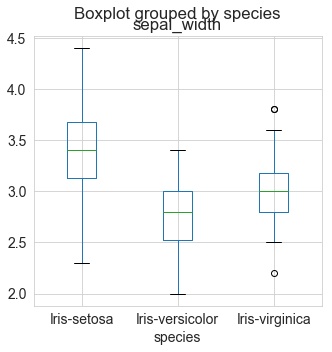

In [135]:
iris.boxplot(column='sepal_width', by='species', figsize=(5,5));

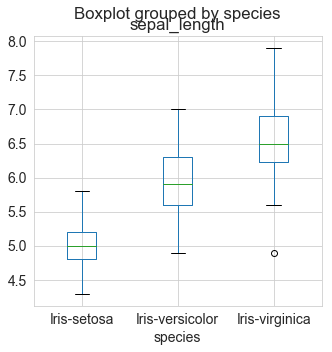

In [136]:
iris.boxplot(column='sepal_length', by='species', figsize=(5,5));

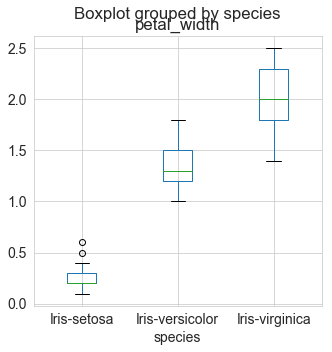

In [137]:
iris.boxplot(column='petal_width', by='species', figsize=(5,5));

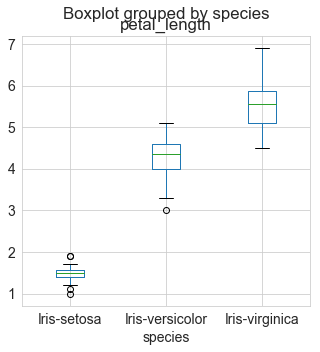

In [138]:
iris.boxplot(column='petal_length', by='species', figsize=(5,5));

- Get the accuracy of a null model that simply predicts the most common species.

In [75]:
iris.loc[:,'species'].value_counts() #Null model would have 33.33% accuracy (50/150)

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [104]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.species_num


In [105]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True) 

print(np.mean(-cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(-cross_val_score(knn, X_test, y_test, cv=kf,scoring='neg_mean_squared_error')))

0.035606060606060606
0.10833333333333332


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed significantly better on the training set relative to the null model.  This result indicates the features have predictive power on our target variable and our model is doing a reasonable job at predicting the species. This means there is relatively low bias compared to the null model. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed slightly worse on the test set compared to the training set. This indicates our model is overfitting on the training data and there is a variance issue.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Variance problem because the testing error is higher than the training error.  This indicates the model is overfitting

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

The model becamse significantly worse as I increased K from 5 to 10.  The spread between the training and test error doubled. 

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [133]:
import seaborn as sns

# creating list of K for KNN
k_list = list(range(1,30,1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

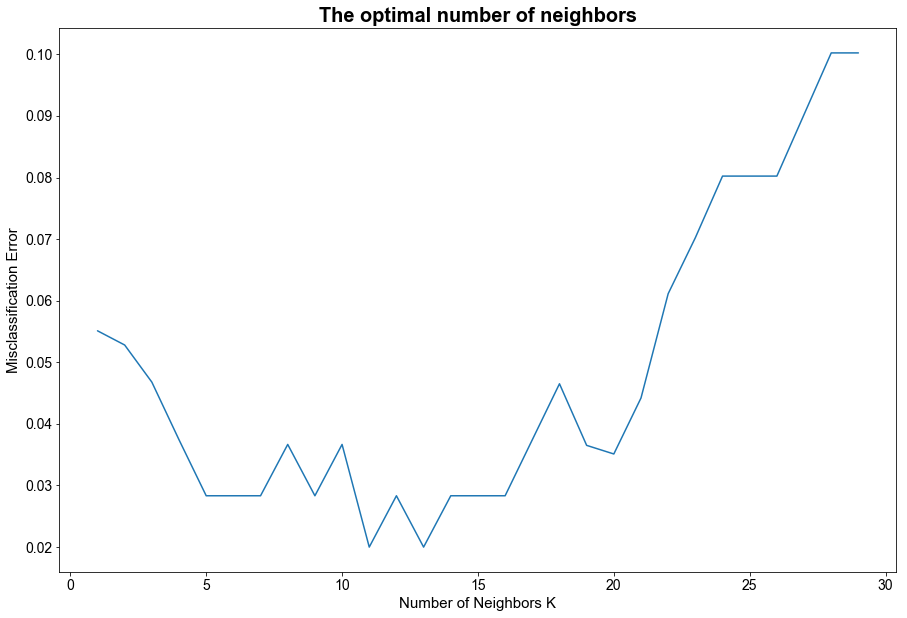

In [134]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))